In [1]:
import pandas as pd
!pip install tqdm
from tqdm import tqdm

In [2]:
df = pd.read_csv('1003-zeya-svobodny.csv', sep=';')
print(df.head())
prediction = {}
for i in range(100):
    prediction['day' + str(i)] = []
prediction['to_predict'] = []
day_couner = 0
counter = 0

    Timestamp  Value
0  2001-01-11     32
1  2001-02-11     39
2  2001-03-11     41
3  2001-04-11     47
4  2001-04-12     23


In [3]:
for i in tqdm(range(len(df['Value']))):
    if i + 100 >= len(df['Value']):
        break
    counter = 0
    for j in range(i, i + 100):
        prediction['day' + str(counter)].append(df['Value'][j].astype(int))
        counter += 1
    prediction['to_predict'].append(df['Value'][i + 100].astype(int))
prediction = pd.DataFrame(prediction)
prediction.head()
         

 99%|████████████████████████████████████▍| 7050/7150 [00:02<00:00, 2687.34it/s]


,day0,day1,day2,day3,day4,day5,day6,day7,day8,day9,...,day91,day92,day93,day94,day95,day96,day97,day98,day99,to_predict
0,32,39,41,47,23,28,-12,-18,7,28,...,75,81,82,98,104,89,80,82,96,98
1,39,41,47,23,28,-12,-18,7,28,31,...,81,82,98,104,89,80,82,96,98,102
2,41,47,23,28,-12,-18,7,28,31,-8,...,82,98,104,89,80,82,96,98,102,102
3,47,23,28,-12,-18,7,28,31,-8,32,...,98,104,89,80,82,96,98,102,102,84
4,23,28,-12,-18,7,28,31,-8,32,45,...,104,89,80,82,96,98,102,102,84,78


In [4]:
from pycaret.regression import *
s = setup(prediction, target = 'to_predict')

,Description,Value
0,session_id,697
1,Target,to_predict
2,Original Data,"(7050, 101)"
3,Missing Values,False
4,Numeric Features,100
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(4934, 100)"


In [5]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,11.2278,404.9779,19.9207,0.9577,0.2375,0.1210,0.5740
lightgbm,Light Gradient Boosting Machine,11.5694,440.5042,20.6864,0.9541,0.2417,0.1334,0.3300
gbr,Gradient Boosting Regressor,11.8248,441.6718,20.8038,0.9539,0.2502,0.1389,0.8240
rf,Random Forest Regressor,11.5442,445.2750,20.8374,0.9537,0.2355,0.1272,1.7660
omp,Orthogonal Matching Pursuit,10.9265,452.9436,20.9059,0.9529,0.2303,0.1181,0.0150
lasso,Lasso Regression,11.1926,458.4712,21.0760,0.9523,0.2360,0.1202,0.1630
en,Elastic Net,11.2593,460.4460,21.1286,0.9521,0.2368,0.1207,0.0430
br,Bayesian Ridge,11.3557,461.7821,21.1686,0.9519,0.2370,0.1213,0.0350
ridge,Ridge Regression,11.3390,463.2058,21.1992,0.9518,0.2388,0.1214,0.0160
lr,Linear Regression,11.3390,463.2054,21.1992,0.9518,0.2388,0.1214,0.2450


In [6]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='to_predict', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                    

In [7]:
best_model = load_model('my_best_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [8]:
import matplotlib.pyplot as plt
import numpy as np

def show_predict_with_valid(model, X_valid, Y_valid):
    y_pred = model.predict(X_valid)
    x = list(range(0, len(y_pred)))
    np.reshape(x, (len(x), 1))
    plt.plot(x, y_pred, 'r')
    plt.plot(x, Y_valid, 'g')
    plt.show()

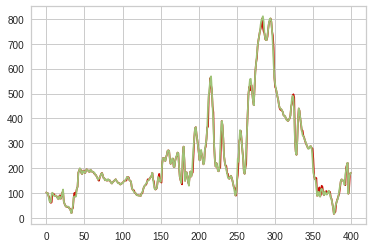

In [9]:
show_predict_with_valid(best_model, prediction[prediction.keys()[:-1]][3800:4200], prediction['to_predict'][3800:4200])